# [Seaborn을 사용한 데이터 분포 시각화]

Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다. Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

- https://seaborn.github.io/

# <span style='color:teal'>1. 스타일 </span>
Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다. 따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다르다. 자세한 내용은 다음 문서를 참조한다.

- http://seaborn.pydata.org/tutorial/aesthetics.html

set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다. set_style 명령은 틱 스타일만 바꿀 수 있다. darkgrid, whitegrid, dark, white, 그리고 ticks 스타일을 제공한다.

set_color_codes 명령으로는 기본 색상을 가리키는 문자열을 바꾼다. 예를 들어 set_color_codes 명령이 적용되기 이전과 이후에 red 문자열이 가리키는 실제 색상 코드는 다르다.

- set: http://seaborn.pydata.org/generated/seaborn.set.html
- set_style: http://seaborn.pydata.org/generated/seaborn.set_style.html
- set_color_codes: http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

In [17]:
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [18]:
import matplotlib as mpl
import matplotlib.pylab as plt 
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

[(f.name,f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

# <span style='color:teal'>2. 색상 팔렛트 </span>
Seaborn은 스타일 지정을 위한 색상 팔렛트(color palette)라는 것을 지원한다. 색상 팔렛트는 Matplotlib의 칼라맵(colormap)으로 사용할 수도 있다. 자세한 내용은 Seaborn의 문서를 참조한다.

- http://seaborn.pydata.org/tutorial/color_palettes.html

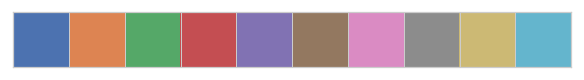

In [4]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

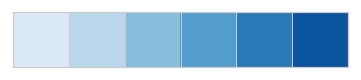

In [5]:
sns.palplot(sns.color_palette("Blues"))

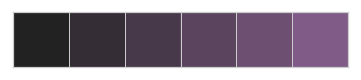

In [6]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

# <span style='color:teal'>3. 1차원 분포 플롯 </span>
1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고 카테고리 값이면 카운트 플롯으로 나타낸다.

우선 연습을 위한 샘플 데이터를 로드한다.

In [7]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### # 1차원 실수 분포 플롯
실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로 Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다. 1차원 실수 분포 플롯 명령에는 rugplot, kdeplot, distplot이 있다.

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

- rugplot: http://seaborn.pydata.org/generated/seaborn.rugplot.html

In [10]:
x = iris.petal_length.values

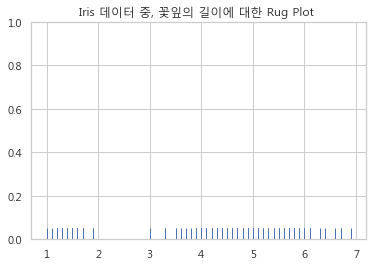

In [19]:
sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.

- kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html
커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.

- http://scikit-learn.org/stable/modules/density.html

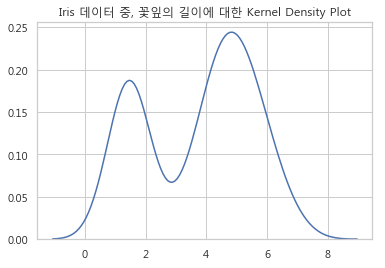

In [20]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.

- distplot: http://seaborn.pydata.org/generated/seaborn.distplot.html

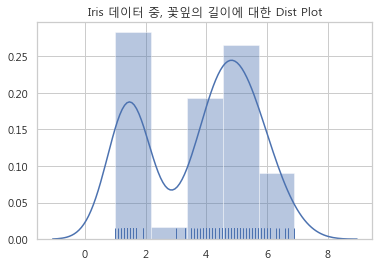

In [21]:
sns.distplot(x, kde=True, rug=True) # dis = 덴서티..?
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### # 카운트 플롯
countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

- countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html
countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.



In [ ]:
countplot(x="column_name", data=dataframe)

data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

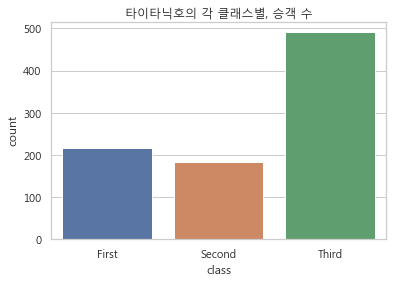

In [22]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

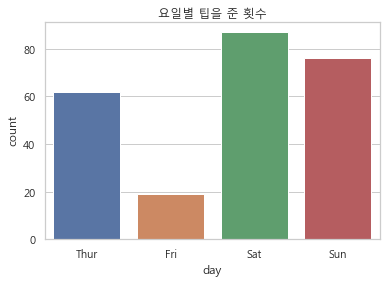

In [23]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

# <span style='color:teal'> 4. 다차원 데이터</span>
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

- 분석하고자 하는 데이터가 모두 실수 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

### # 2차원 실수형 데이터
만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다. 스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용한다. jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.

- jointplot: http://seaborn.pydata.org/generated/seaborn.jointplot.html
jointplot 명령도 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

In [ ]:
jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')

data 인수에는 대상이 되는 데이터프레임을, x 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을, y 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다. kind는 차트의 종류를 지정한다. kind='scatter'이면 스캐터 플롯이다.

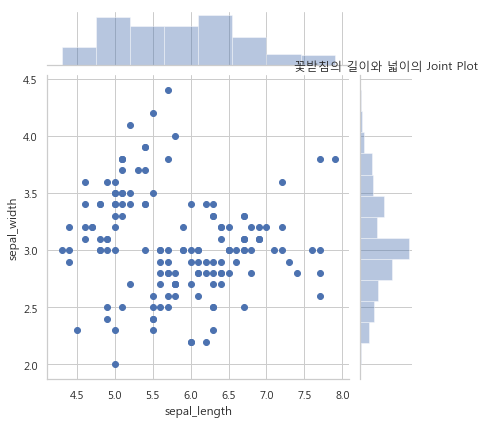

In [24]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.title("꽃받침의 길이와 넓이의 Joint Plot")
plt.show()

kind='kde'이면 커널 밀도 히스토그램을 그린다.

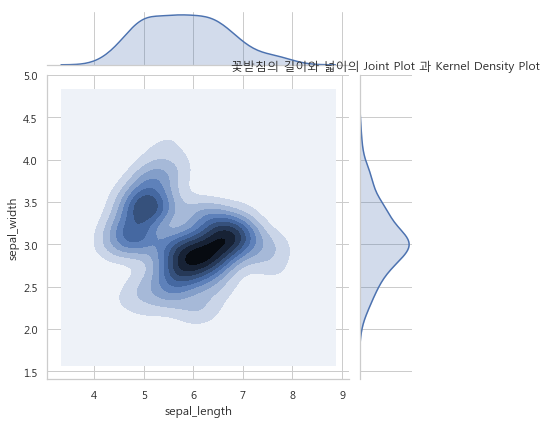

In [25]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.title("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot")
plt.show()

### #다차원 실수형 데이터¶
만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다. pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

- pairplot: http://seaborn.pydata.org/generated/seaborn.pairplot.html

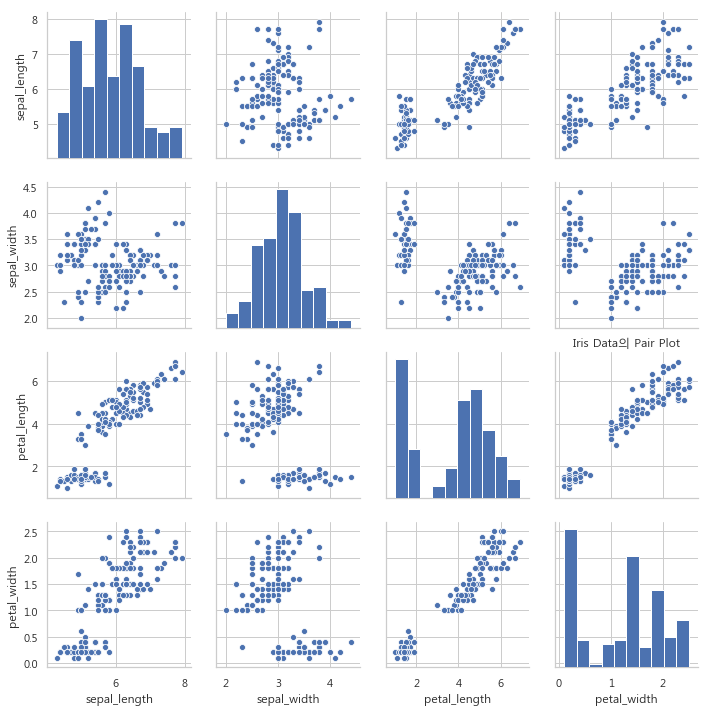

In [26]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()


만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

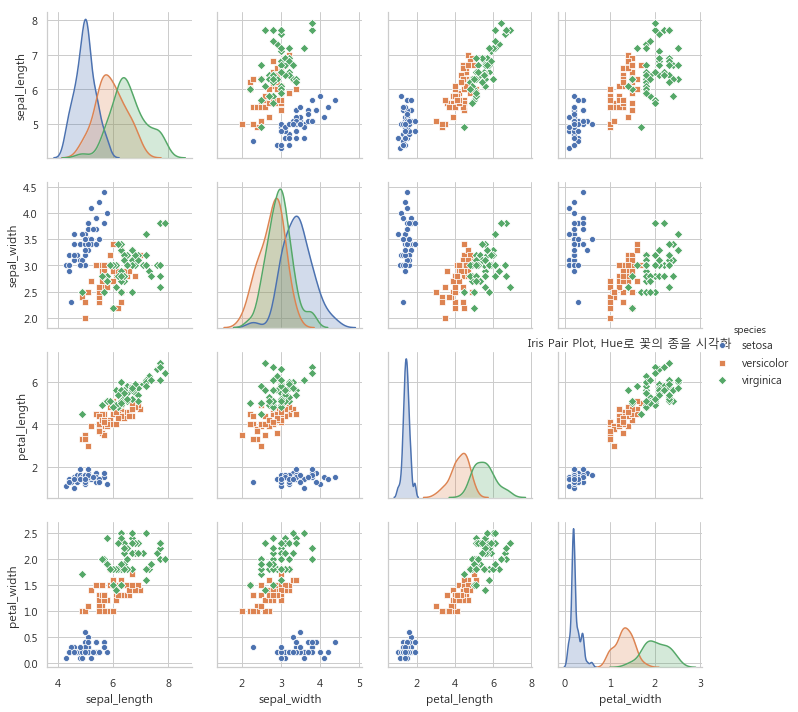

In [27]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### # 2차원 카테고리 데이터¶
만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.

- heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [28]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


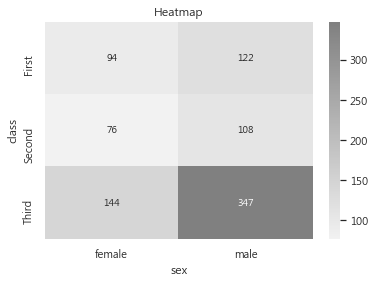

In [29]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### # 2차원 복합 데이터
만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

- barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot

barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다. 평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

- barplot: http://seaborn.pydata.org/generated/seaborn.barplot.html

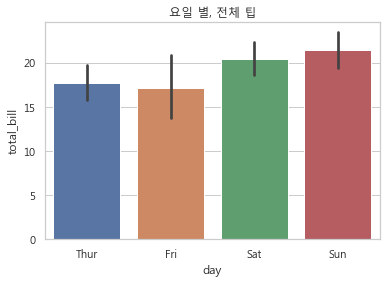

In [30]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

boxplot 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다. 박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다.

- boxplot: http://seaborn.pydata.org/generated/seaborn.boxplot.html

박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다. 박스 내부의 가로선은 중앙값을 나타낸다. 박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로 그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

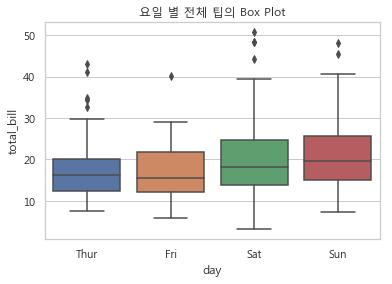

In [31]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

boxplot이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해 violinplot, stripplot. swarmplot 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다.

violinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.

- violinplot: http://seaborn.pydata.org/generated/seaborn.violinplot.html

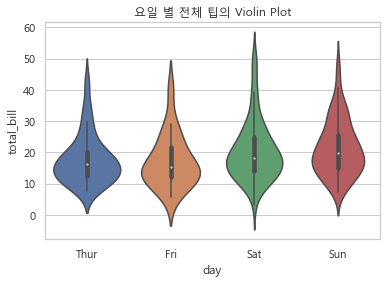

In [32]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

stripplot은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다. jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

- stripplot: http://seaborn.pydata.org/generated/seaborn.stripplot.html

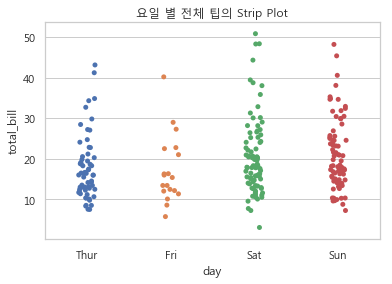

In [33]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

swarmplot은 stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.

- swarmplot: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

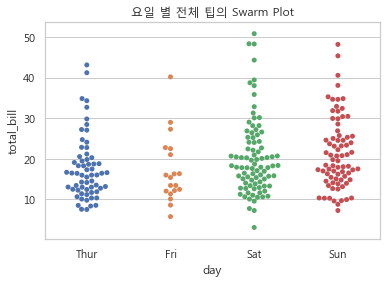

In [34]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

# <span style='color:teal'> </span>

In [ ]:
# <span style='color:teal'> </span>